In [1]:
import pandas as pd
import geopandas as gpd
import matplotlib.pyplot as plt
import cartopy.crs as ccrs
from shapely.geometry import Point
df = pd.read_csv('/data/acker/ALA/ranks_washu_max_2021-2023.csv')
df

,Unnamed: 0,GEOID,PM25_90th,geometry,STATEFP,COUNTYFP,CDVE_rank
0,0,1001,7.800000,"POLYGON ((-86.921196 32.657542, -86.920352 32....",1,1,1085
1,1,1003,8.466667,"POLYGON ((-88.02858 30.226763, -88.023991 30.2...",1,3,413
2,2,1005,7.666667,"POLYGON ((-85.748032 31.619181, -85.745435 31....",1,5,1230
3,3,1007,8.266667,"POLYGON ((-87.421936 33.003379, -87.331769 33....",1,7,599
4,4,1009,7.633333,"POLYGON ((-86.963358 33.858221, -86.959667 33....",1,9,1278
...,...,...,...,...,...,...,...
3137,3137,56037,5.466667,"POLYGON ((-110.054384 42.01103, -110.054363 42...",56,37,2954
3138,3138,56039,5.033333,"POLYGON ((-111.053610326574 44.6662669770011, ...",56,39,3035
3139,3139,56041,6.333333,"POLYGON ((-111.046626637972 41.1401249258729, ...",56,41,2637
3140,3140,56043,5.266666,"POLYGON ((-108.550628 44.151793, -108.550562 4...",56,43,2994


In [2]:
df1 = df.sort_values(by='CDVE_rank', ascending=True)
df1

,Unnamed: 0,GEOID,PM25_90th,geometry,STATEFP,COUNTYFP,CDVE_rank
76,76,2090,14.333333,"POLYGON ((-148.663265 64.59079, -148.648208 64...",2,90,1
217,217,6063,14.200000,"POLYGON ((-121.497032 40.437017, -121.494866 4...",6,63,2
238,238,6105,13.466666,"POLYGON ((-123.622387 40.931703, -123.614562 4...",6,105,3
239,239,6107,12.933334,"POLYGON ((-119.566468 36.494339, -119.563662 3...",6,107,4
197,197,6023,12.633334,"POLYGON ((-124.408601 40.443201, -124.396642 4...",6,23,5
...,...,...,...,...,...,...,...
548,548,15005,3.533334,"POLYGON ((-157.014590828961 21.1835249334756, ...",15,5,3138
1805,1805,35019,3.500000,"POLYGON ((-105.312707 34.354046, -105.313009 3...",35,19,3139
83,83,2158,3.366667,"MULTIPOLYGON (((-164.616424 63.045106, -164.61...",2,158,3140
547,547,15003,3.100000,"MULTIPOLYGON (((-157.659825 21.328568, -157.65...",15,3,3141


In [3]:
df1 = df1.drop('geometry',axis=1)

In [4]:
#upload shapefile of U.S. counties
counties = gpd.read_file('/data/acker/shapefiles/cb_2020_us_county_500k.shp')

In [5]:
# List of state abbreviations for CONUS, Alaska (AK), and Hawaii (HI)
states_to_include = [
    'AL', 'AK', 'AZ', 'AR', 'CA', 'CO', 'CT', 'DE', 'FL', 'GA', 'HI', 'ID', 'DC',
    'IL', 'IN', 'IA', 'KS', 'KY', 'LA', 'ME', 'MD', 'MA', 'MI', 'MN', 'MS',
    'MO', 'MT', 'NE', 'NV', 'NH', 'NJ', 'NM', 'NY', 'NC', 'ND', 'OH', 'OK',
    'OR', 'PA', 'RI', 'SC', 'SD', 'TN', 'TX', 'UT', 'VT', 'VA', 'WA', 'WV',
    'WI', 'WY'
]

# Filter counties to only include rows where STUSPS is in the specified list
counties_conus = counties[counties['STUSPS'].isin(states_to_include)]

counties_conus = counties_conus.drop(['STATEFP', 'COUNTYFP', "COUNTYNS", 'NAMELSAD', 'LSAD', 'ALAND', 'AWATER', 'AFFGEOID'], axis=1)

In [6]:
counties_conus['GEOID'] = counties_conus['GEOID'].astype(int)

In [7]:
# Merge the 90th percentile data with the counties GeoDataFrame to include geometry
df_counties = df1.merge(counties_conus[['GEOID', 'geometry','STUSPS']], on='GEOID', how='left')

# Convert to a GeoDataFrame if necessary
df_counties = gpd.GeoDataFrame(df_counties, geometry='geometry')

# Display the result
df_counties


,Unnamed: 0,GEOID,PM25_90th,STATEFP,COUNTYFP,CDVE_rank,geometry,STUSPS
0,76,2090,14.333333,2,90,1,"POLYGON ((-148.66326 64.59079, -148.64821 64.5...",AK
1,217,6063,14.200000,6,63,2,"POLYGON ((-121.49703 40.43702, -121.49487 40.4...",CA
2,238,6105,13.466666,6,105,3,"POLYGON ((-123.62239 40.9317, -123.61456 40.93...",CA
3,239,6107,12.933334,6,107,4,"POLYGON ((-119.56647 36.49434, -119.56366 36.4...",CA
4,197,6023,12.633334,6,23,5,"POLYGON ((-124.4086 40.4432, -124.39664 40.462...",CA
...,...,...,...,...,...,...,...,...
3137,548,15005,3.533334,15,5,3138,"POLYGON ((-157.01459 21.18352, -157.01192 21.1...",HI
3138,1805,35019,3.500000,35,19,3139,"POLYGON ((-105.31271 34.35405, -105.31301 34.3...",NM
3139,83,2158,3.366667,2,158,3140,"MULTIPOLYGON (((-164.61642 63.04511, -164.6145...",AK
3140,547,15003,3.100000,15,3,3141,"MULTIPOLYGON (((-157.65982 21.32857, -157.6588...",HI


In [8]:
import numpy as np

# Extract the North Slope row from `counties_conus`
north_slope = counties[counties['GEOID'] == '02185'].copy()

# Set the `PM25_90th` column to None (or NaN) so it appears gray on the plot
north_slope['DV'] = np.nan

In [9]:
df_counties = df_counties[df_counties['PM25_90th'] != 0]

In [ ]:
#updated ranks to match 2022 CDVEs
import matplotlib.patches as mpatches
import matplotlib.pyplot as plt
import cartopy.crs as ccrs

# Define updated rank ranges and colors based on new groupings
county_90th_percentile_with_geometry = df_counties.to_crs("EPSG:4326")

range_colors = {
    "1 - 8": "#003f4c",
    "9 - 157": "#374c80",
    "158 - 395": "#7a5195",
    "396 - 787": "#bc5090",
    "788 - 1418": "#ef5675",
    "1419 - 2450": "#ff764a",
    "2451 - 3142": "#ffa600",
}

# Assign colors manually based on new rank ranges
def assign_color(value):
    if pd.isna(value):
        return 'white'
    elif 2451 <= value <= 3142:
        return range_colors["2451 - 3142"]
    elif 1419 <= value <= 2450:
        return range_colors["1419 - 2450"]
    elif 788 <= value <= 1418:
        return range_colors["788 - 1418"]
    elif 396 <= value <= 787:
        return range_colors["396 - 787"]
    elif 158 <= value <= 395:
        return range_colors["158 - 395"]
    elif 9 <= value <= 157:
        return range_colors["9 - 157"]
    elif 1 <= value <= 8:
        return range_colors["1 - 8"]

# Create a new column for colors
county_90th_percentile_with_geometry['color'] = county_90th_percentile_with_geometry['CDVE_rank'].apply(assign_color)

# Create the main figure
fig = plt.figure(figsize=(15, 10))

# Main map (CONUS)
ax_conus = fig.add_subplot(1, 1, 1, projection=ccrs.PlateCarree())
ax_conus.set_extent([-135, -65, 20, 50], crs=ccrs.PlateCarree())  # CONUS bounds
ax_conus.set_frame_on(False)

# Alaska inset with rotation and correct projection
alaska_projection = ccrs.AlbersEqualArea(central_longitude=-150, central_latitude=60)
ax_alaska = fig.add_axes([0.12, 0.17, 0.22, 0.25], projection=alaska_projection)
ax_alaska.set_extent([-180, -126, 50, 72], crs=ccrs.PlateCarree())  # Alaska bounds

# Plot North Slope separately in gray
north_slope.plot(
    ax=ax_alaska, color='lightgray', edgecolor='black', linewidth=0.1, 
    transform=ccrs.PlateCarree()
)

# Hawaii inset positioned within the main figure, next to Alaska inset
ax_hawaii = fig.add_axes([0.32, 0.17, 0.12, 0.12], projection=ccrs.PlateCarree())
ax_hawaii.set_extent([-161, -154, 18, 23], crs=ccrs.PlateCarree())  # Hawaii bounds

# Missing data color
missing_kwds = {"color": "lightgray", "edgecolor": "black", "linewidth": 0.1}

# Plot the data for each map
county_90th_percentile_with_geometry.plot(
    color=county_90th_percentile_with_geometry['color'], linewidth=0.1, edgecolor='black', ax=ax_conus
)
county_90th_percentile_with_geometry.plot(
    color=county_90th_percentile_with_geometry['color'], linewidth=0.1, edgecolor='black', ax=ax_alaska, transform=ccrs.PlateCarree()
)
county_90th_percentile_with_geometry.plot(
    color=county_90th_percentile_with_geometry['color'], linewidth=0.1, edgecolor='black', ax=ax_hawaii
)

# Add a custom legend
labels = ["1 - 8", "9 - 157", "158 - 395", "396 - 787", "788 - 1418", "1419 - 2450", "2451 - 3142"]
legend_patches = [mpatches.Patch(color=range_colors[label], label=label) for label in labels]

# Add N/A patch with custom styling (white with a black outline)
na_patch = mpatches.Patch(facecolor="white", edgecolor="black", label="N/A")
legend_patches.append(na_patch)

plt.legend(
    handles=legend_patches,
    bbox_to_anchor=(6.8, 1.9),  # Adjusted to place it in the lower right corner
    title="2021-2023 Rank",
    fontsize=11,
    title_fontsize=12
)

# Show the plot
plt.show()


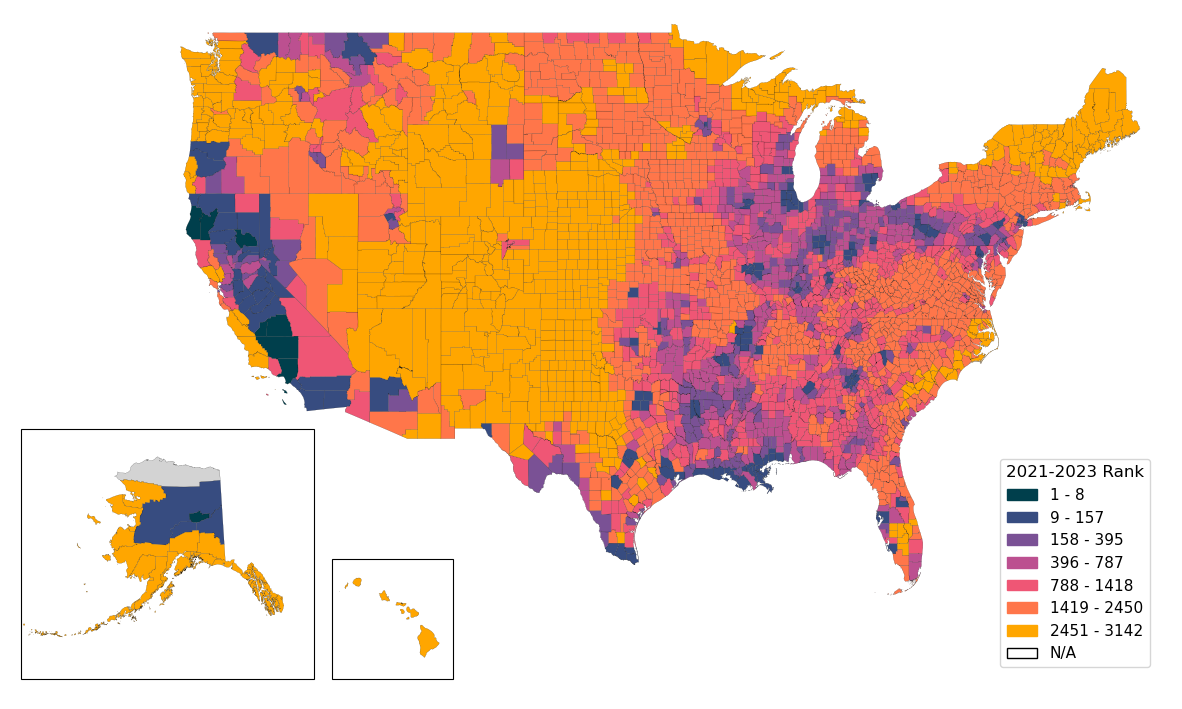

In [ ]:
#updated ranks to match 2022 CDVEs
import matplotlib.patches as mpatches
import matplotlib.pyplot as plt
import cartopy.crs as ccrs

# Define updated rank ranges and colors based on new groupings
county_90th_percentile_with_geometry = df_counties.to_crs("EPSG:4326")

range_colors = {
    "1 - 8": "#003f4c",
    "9 - 157": "#374c80",
    "158 - 395": "#7a5195",
    "396 - 787": "#bc5090",
    "788 - 1418": "#ef5675",
    "1419 - 2450": "#ff764a",
    "2451 - 3142": "#ffa600",
}

# Assign colors manually based on new rank ranges
def assign_color(value):
    if pd.isna(value):
        return 'white'
    elif 2451 <= value <= 3142:
        return range_colors["2451 - 3142"]
    elif 1419 <= value <= 2450:
        return range_colors["1419 - 2450"]
    elif 788 <= value <= 1418:
        return range_colors["788 - 1418"]
    elif 396 <= value <= 787:
        return range_colors["396 - 787"]
    elif 158 <= value <= 395:
        return range_colors["158 - 395"]
    elif 9 <= value <= 157:
        return range_colors["9 - 157"]
    elif 1 <= value <= 8:
        return range_colors["1 - 8"]

# Create a new column for colors
county_90th_percentile_with_geometry['color'] = county_90th_percentile_with_geometry['CDVE_rank'].apply(assign_color)

# Create the main figure
fig = plt.figure(figsize=(15, 10))

# Main map (CONUS)
ax_conus = fig.add_subplot(1, 1, 1, projection=ccrs.PlateCarree())
ax_conus.set_extent([-135, -65, 20, 50], crs=ccrs.PlateCarree())  # CONUS bounds
ax_conus.set_frame_on(False)

# Alaska inset with rotation and correct projection
alaska_projection = ccrs.AlbersEqualArea(central_longitude=-150, central_latitude=60)
ax_alaska = fig.add_axes([0.12, 0.17, 0.22, 0.25], projection=alaska_projection)
ax_alaska.set_extent([-180, -126, 50, 72], crs=ccrs.PlateCarree())  # Alaska bounds

# Plot North Slope separately in gray
north_slope.plot(
    ax=ax_alaska, color='lightgray', edgecolor='black', linewidth=0.1, 
    transform=ccrs.PlateCarree()
)

# Hawaii inset positioned within the main figure, next to Alaska inset
ax_hawaii = fig.add_axes([0.32, 0.17, 0.12, 0.12], projection=ccrs.PlateCarree())
ax_hawaii.set_extent([-161, -154, 18, 23], crs=ccrs.PlateCarree())  # Hawaii bounds

# Missing data color
missing_kwds = {"color": "lightgray", "edgecolor": "black", "linewidth": 0.1}

# Plot the data for each map
county_90th_percentile_with_geometry.plot(
    color=county_90th_percentile_with_geometry['color'], linewidth=0.1, edgecolor='black', ax=ax_conus
)
county_90th_percentile_with_geometry.plot(
    color=county_90th_percentile_with_geometry['color'], linewidth=0.1, edgecolor='black', ax=ax_alaska, transform=ccrs.PlateCarree()
)
county_90th_percentile_with_geometry.plot(
    color=county_90th_percentile_with_geometry['color'], linewidth=0.1, edgecolor='black', ax=ax_hawaii
)

# Add a custom legend
labels = ["1 - 8", "9 - 157", "158 - 395", "396 - 787", "788 - 1418", "1419 - 2450", "2451 - 3142"]
legend_patches = [mpatches.Patch(color=range_colors[label], label=label) for label in labels]

# Add N/A patch with custom styling (white with a black outline)
na_patch = mpatches.Patch(facecolor="white", edgecolor="black", label="N/A")
legend_patches.append(na_patch)

plt.legend(
    handles=legend_patches,
    bbox_to_anchor=(6.8, 1.9),  # Adjusted to place it in the lower right corner
    title="2021-2023 Rank",
    fontsize=11,
    title_fontsize=12
)

# Show the plot
plt.show()


In [19]:
# Define revised rank ranges (7 ranges in total)
rank_ranges = {
    "1 - 8": (1, 8),
    "9 - 157": (9, 157),
    "158 - 395": (158, 395),
    "396 - 787": (396, 787),
    "788 - 1418": (788, 1418),
    "1419 - 2450": (1419, 2450),
    "2451 - 3142": (2451, 3142)
}

# Initialize a dictionary to store results
cdve_ranges = {}

# Calculate the range of CDVEs for each rank range
for label, (rank_min, rank_max) in rank_ranges.items():
    # Filter dataframe for the current rank range
    filtered_df = county_90th_percentile_with_geometry[
        (county_90th_percentile_with_geometry["CDVE_rank"] >= rank_min) &
        (county_90th_percentile_with_geometry["CDVE_rank"] <= rank_max)
    ]
    
    # Calculate the min and max CDVE values
    min_cdve = filtered_df["PM25_90th"].min()
    max_cdve = filtered_df["PM25_90th"].max()
    
    # Store the result
    cdve_ranges[label] = (min_cdve, max_cdve)

# Display the results
for label, (min_cdve, max_cdve) in cdve_ranges.items():
    print(f"{label}: CDVE Range: {min_cdve:.2f} to {max_cdve:.2f} µg/m³")


1 - 8: CDVE Range: 12.43 to 14.33 µg/m³
9 - 157: CDVE Range: 9.11 to 11.67 µg/m³
158 - 395: CDVE Range: 8.50 to 9.10 µg/m³
396 - 787: CDVE Range: 8.10 to 8.49 µg/m³
788 - 1418: CDVE Range: 7.53 to 8.07 µg/m³
1419 - 2450: CDVE Range: 6.60 to 7.53 µg/m³
2451 - 3142: CDVE Range: 2.43 to 6.57 µg/m³


In [15]:
import numpy as np
import pandas as pd

# Sort dataframe by CDVE rank
county_90th_percentile_with_geometry = county_90th_percentile_with_geometry.sort_values(by="CDVE_rank")

# Define the target CDVE breakpoints (from your desired output)
desired_cdve_ranges = [
    (12.1, 29.4),
    (9.1, 12),
    (8.5, 9),
    (8.0, 8.4),
    (7.4, 7.9),
    (6.1, 7.3),
    (2.4, 6)
]

# Identify new rank breakpoints to match desired CDVE ranges
cdve_values = county_90th_percentile_with_geometry["PM25_90th"].values
cdve_ranks = county_90th_percentile_with_geometry["CDVE_rank"].values

# Ensure ranks are continuous
new_rank_ranges = {}
prev_rank = 1  # Start at rank 1

for i, (cdve_min, cdve_max) in enumerate(desired_cdve_ranges):
    # Find the first and last rank indices that match this CDVE range
    match_indices = np.where((cdve_values >= cdve_min) & (cdve_values <= cdve_max))[0]

    if len(match_indices) > 0:
        start_rank = prev_rank
        end_rank = start_rank + len(match_indices) - 1  # Make ranks continuous
        new_rank_ranges[f"Group {i+1}"] = (start_rank, end_rank)
        prev_rank = end_rank + 1  # Ensure next group starts immediately after
    else:
        print(f"Warning: No match found for range {cdve_min}-{cdve_max} μg/m³")

# Print the updated rank ranges
for label, (rank_min, rank_max) in new_rank_ranges.items():
    print(f"{label}: Rank {rank_min} to {rank_max}")


Group 1: Rank 1 to 8
Group 2: Rank 9 to 157
Group 3: Rank 158 to 395
Group 4: Rank 396 to 787
Group 5: Rank 788 to 1418
Group 6: Rank 1419 to 2450
Group 7: Rank 2451 to 2793


In [22]:
# epa CDVs for pearson
gdf_epa = pd.read_csv('/data/acker/EPA_DV/2021-2023.csv')

# Function to add leading zero to 11-digit codes
def add_leading_zero(code):
    code_str = str(code).strip()
    if len(code_str) == 1:
        ret = '0' + code_str
        return ret
    return code_str

# Iterate through each block group ID in ejscreen and update if necessary
for i in range(len(gdf_epa)):
    gdf_epa.at[i, 'State FIPS'] = add_leading_zero(gdf_epa.at[i, 'State FIPS'])

# Iterate through each block group ID in ejscreen and update if necessary
for i in range(len(gdf_epa)):
    gdf_epa.at[i, 'County FIPS'] = add_leading_zero(gdf_epa.at[i, 'County FIPS'])


# Function to add leading zero to 11-digit codes
def add_leading_zero(code):
    code_str = str(code).strip()
    if len(code_str) == 2:
        ret = '0' + code_str
        return ret
    return code_str


for i in range(len(gdf_epa)):
    gdf_epa.at[i, 'County FIPS'] = add_leading_zero(gdf_epa.at[i, 'County FIPS'])



/tmp/ipykernel_367861/3143190062.py:14: FutureWarning: Setting an item of incompatible dtype is deprecated and will raise an error in a future version of pandas. Value '01' has dtype incompatible with int64, please explicitly cast to a compatible dtype first.
  gdf_epa.at[i, 'State FIPS'] = add_leading_zero(gdf_epa.at[i, 'State FIPS'])
/tmp/ipykernel_367861/3143190062.py:18: FutureWarning: Setting an item of incompatible dtype is deprecated and will raise an error in a future version of pandas. Value '03' has dtype incompatible with int64, please explicitly cast to a compatible dtype first.
  gdf_epa.at[i, 'County FIPS'] = add_leading_zero(gdf_epa.at[i, 'County FIPS'])


In [41]:
unmonitored_counties = pd.read_csv('/data/acker/ALA/washu_2021-2023_unmonitored.csv')
merged = pd.read_csv('/data/acker/ALA/washu_2021-2023_merged.csv')
merged

,Unnamed: 0,index,GEOID,PM25_90th,geometry,STATEFP,COUNTYFP,CDVE_rank,ID,Design Value
0,0,0,2090,14.333333,"POLYGON ((-148.663265 64.59079, -148.648208 64...",2,90,1,02_090,12.1
1,1,1,6063,14.200000,"POLYGON ((-121.497032 40.437017, -121.494866 4...",6,63,2,06_063,14.0
2,2,2,6107,12.933334,"POLYGON ((-119.566468 36.494339, -119.563662 3...",6,107,4,06_107,15.7
3,3,3,6023,12.633334,"POLYGON ((-124.408601 40.443201, -124.396642 4...",6,23,5,06_023,6.9
4,4,4,6029,12.599999,"POLYGON ((-120.194369 35.789363, -120.003075 3...",6,29,6,06_029,16.2
...,...,...,...,...,...,...,...,...,...,...
531,531,531,2020,4.133333,"MULTIPOLYGON (((-150.07348 61.158341, -150.069...",2,20,3118,02_020,5.1
532,532,532,2110,3.900000,"MULTIPOLYGON (((-134.669316 58.333266, -134.66...",2,110,3128,02_110,4.6
533,533,533,15001,3.633333,"POLYGON ((-156.061472300793 19.7281342390482, ...",15,1,3133,15_001,4.4
534,534,534,15009,3.556667,"MULTIPOLYGON (((-156.697418 20.916368, -156.69...",15,9,3136,15_009,4.0


In [42]:
# Define a function to assign range categories
    
def assign_range(value):
    if pd.isna(value):
        return 'white'
    elif 2451 <= value <= 3142:
        return "2451 - 3142"
    elif 1419 <= value <= 2450:
        return "1419 - 2450"
    elif 788 <= value <= 1418:
        return "788 - 1418"
    elif 396 <= value <= 787:
        return "396 - 787"
    elif 158 <= value <= 395:
        return "158 - 395"
    elif 9 <= value <= 157:
        return "9 - 157"
    elif 1 <= value <= 8:
        return "1 - 8"


# Assign range categories
unmonitored_counties['range'] = unmonitored_counties['CDVE_rank'].apply(assign_range)

# Group by 'range' and get counts and states
summary = (
    unmonitored_counties.groupby('range')
    .agg(count=('GEOID', 'count'))
    .reset_index()
)

# Display the summary
print(summary)


         range  count
0        1 - 8      1
1  1419 - 2450    942
2    158 - 395    153
3  2451 - 3142    593
4    396 - 787    308
5   788 - 1418    552
6      9 - 157     57


In [43]:
# Assign range categories
merged['range'] = merged['CDVE_rank'].apply(assign_range)

# Group by 'range' and get counts and states
summary = (
    merged.groupby('range')
    .agg(count=('GEOID', 'count'))
    .reset_index()
)
# Display the summary
print(summary)

         range  count
0        1 - 8      7
1  1419 - 2450    105
2    158 - 395     99
3  2451 - 3142     73
4    396 - 787     84
5   788 - 1418     76
6      9 - 157     92


In [44]:
import numpy as np
import pandas as pd
from scipy.stats import rankdata

# Merge the two DataFrames on 'GEOID' to get matched pairs for CDV and CDVE

# Drop rows with NaN values in either column

# Compute rank values
merged['CDV_rank'] = rankdata(-merged['Design Value'], method='min')

merged

,Unnamed: 0,index,GEOID,PM25_90th,geometry,STATEFP,COUNTYFP,CDVE_rank,ID,Design Value,range,CDV_rank
0,0,0,2090,14.333333,"POLYGON ((-148.663265 64.59079, -148.648208 64...",2,90,1,02_090,12.1,1 - 8,16
1,1,1,6063,14.200000,"POLYGON ((-121.497032 40.437017, -121.494866 4...",6,63,2,06_063,14.0,1 - 8,6
2,2,2,6107,12.933334,"POLYGON ((-119.566468 36.494339, -119.563662 3...",6,107,4,06_107,15.7,1 - 8,2
3,3,3,6023,12.633334,"POLYGON ((-124.408601 40.443201, -124.396642 4...",6,23,5,06_023,6.9,1 - 8,413
4,4,4,6029,12.599999,"POLYGON ((-120.194369 35.789363, -120.003075 3...",6,29,6,06_029,16.2,1 - 8,1
...,...,...,...,...,...,...,...,...,...,...,...,...
531,531,531,2020,4.133333,"MULTIPOLYGON (((-150.07348 61.158341, -150.069...",2,20,3118,02_020,5.1,2451 - 3142,505
532,532,532,2110,3.900000,"MULTIPOLYGON (((-134.669316 58.333266, -134.66...",2,110,3128,02_110,4.6,2451 - 3142,517
533,533,533,15001,3.633333,"POLYGON ((-156.061472300793 19.7281342390482, ...",15,1,3133,15_001,4.4,2451 - 3142,521
534,534,534,15009,3.556667,"MULTIPOLYGON (((-156.697418 20.916368, -156.69...",15,9,3136,15_009,4.0,2451 - 3142,524


In [45]:
# Assign range categories
merged['range1'] = merged['CDV_rank'].apply(assign_range)

# Group by 'range' and get counts and states
summary = (
    merged.groupby('range1')
    .agg(count=('GEOID', 'count'))
    .reset_index()
)
# Display the summary
print(summary)

      range1  count
0      1 - 8      9
1  158 - 395    235
2  396 - 787    134
3    9 - 157    158


In [70]:
df = df[df['WashU GL 2018-2020 DV Max'] != 0]

In [71]:
# Assign range categories
df['range'] = df['2018-2020 Rank'].apply(assign_range)

# Group by 'range' and get counts and states
summary = (
    df.groupby('range')
    .agg(count=('GEOID', 'count'))
    .reset_index()
)
# Display the summary
print(summary)

         range  count
0       1 - 44     45
1  1443 - 1929    413
2  1930 - 2486    559
3  2487 - 3142    644
4    376 - 921    603
5     45 - 375    338
6   922 - 1442    540


/tmp/ipykernel_40259/529630541.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['range'] = df['2018-2020 Rank'].apply(assign_range)


In [76]:
def assign_range(value):
    if pd.isna(value):
        return 'N/A'
    elif 12.1 <= value <= 29.4:
        return "tier1"
    elif 9.1 <= value <= 12:
        return "tier2"
    elif 8.5 <= value <= 9:
        return "tier3"
    elif 8 <= value <= 8.4:
        return "tier4"
    elif 7.4 <= value <= 7.9:
        return "tier5"
    elif 6.1 <= value <= 7.3:
        return "tier6"
    elif 3.3 <= value <= 6:
        return "tier7"
    else:
        return 'lower'
# Assign range categories
df_epa['range'] = df_epa['EPA 2018-2020 DV'].apply(assign_range)

# Group by 'range' and get counts and states
summary = (
    df_epa.groupby('range')
    .agg(count=('GEOID', 'count'))
    .reset_index()
)
# Display the summary
print(summary)

   range  count
0  lower      7
1  tier1     21
2  tier2     73
3  tier3     61
4  tier4     66
5  tier5     86
6  tier6    129
7  tier7     76


/home/acker/miniconda3/envs/tempo/lib/python3.12/site-packages/geopandas/geodataframe.py:1819: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  super().__setitem__(key, value)
